In [1]:
import sys
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_y  = train.pop('label')
train_X = train
test_X = test

In [5]:
MNIST_train = train_X.values.reshape(-1,28,28)
MNIST_test = test_X.values.reshape(-1,28,28)

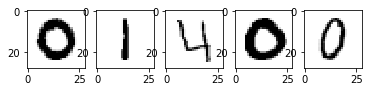

In [6]:
for i in range(1,6):
    plt.subplot(1,5,i)
    plt.imshow(MNIST_train[i],cmap=plt.cm.binary)

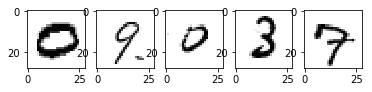

In [7]:
for i in range(1,6):
    plt.subplot(1,5,i)
    plt.imshow(MNIST_test[i],cmap=plt.cm.binary)

In [8]:
from sklearn.decomposition import PCA

In [55]:
#pca = PCA(n_components=100,svd_solver='randomized',random_state=42)
pca = PCA(0.90)
pc = pca.fit_transform(train_X)
pc.shape

(42000, 87)

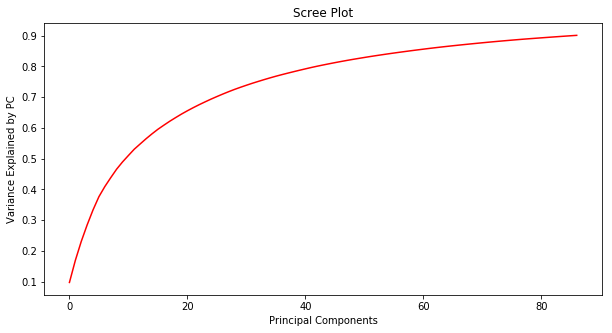

In [56]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_),c='red')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained by PC')
plt.title('Scree Plot')
plt.show()

In [57]:
pd.DataFrame(pc.transpose()).head()

,0,1,2,3,4,5,6,7,8,9,...,41990,41991,41992,41993,41994,41995,41996,41997,41998,41999
0,-661.595780,1701.451685,-886.894434,-165.755602,1923.709716,487.751911,-672.323164,-114.381815,350.229366,297.392088,...,-339.624272,-893.087401,359.053713,479.839948,453.992780,760.355279,-1059.873183,336.269982,327.399392,-364.249200
1,-699.311328,-360.551556,-293.765782,300.182761,-449.153069,192.752402,464.803974,-20.727143,141.012974,-807.412236,...,-480.695415,-640.651256,415.966625,28.724850,666.820872,-249.854220,-302.292351,950.015280,62.016089,418.893026
2,183.282040,-501.805594,67.155310,-64.145485,-548.613023,-6.435850,-313.660059,-504.583556,-389.030657,-39.372849,...,-1009.672501,237.835687,-403.353452,3.610436,-353.198728,-406.991832,2.941098,-168.605414,697.536401,62.899823
3,120.611394,335.423656,78.263763,759.706261,188.555147,-40.856597,-136.130730,-89.649334,-619.261384,-51.966151,...,69.020073,-152.686692,857.141165,699.631785,317.271583,-322.864160,38.667116,-692.680963,482.810439,77.580323
4,-81.081811,-442.378933,-473.715921,-425.844379,-651.736273,-47.260658,-325.544409,-253.972945,288.790581,-43.390507,...,58.333569,17.400693,-44.202546,541.010202,-161.934957,-1005.138838,-360.053230,-539.363843,-154.813778,54.866087


In [58]:
corr_matrix = np.corrcoef(pc.transpose())

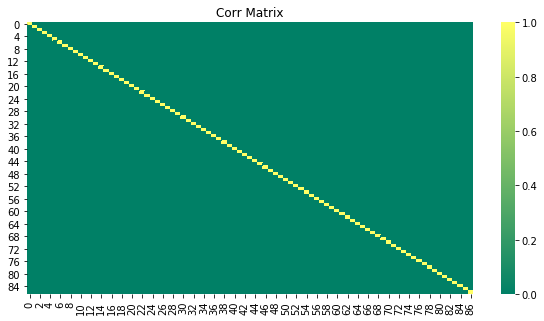

In [59]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix,cmap='summer')
plt.title('Corr Matrix')
plt.show()

In [60]:
corr_min_max = corr_matrix - np.diagflat(corr_matrix.diagonal())
print("max corr:",corr_min_max.max(), ", min corr: ", corr_min_max.min(),)

max corr: 1.668833121032915e-15 , min corr:  -1.4898716948556503e-15


In [61]:
df_test_pca = pca.transform(test_X)

In [62]:
df_test_pca.shape

(28000, 87)

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logistic_pca = LogisticRegression()
model_pca = logistic_pca.fit(pc,train_y)

In [64]:
#Making prediction on the test data
prediction = model_pca.predict(df_test_pca)

In [65]:
pd.DataFrame({'ImageId':[x+1 for x in range(0,len(test_X))],
              'Label':prediction}).to_csv('submission.csv',index=False)